PACKAGES

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from sklearn import  linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

READING IN THE ACCIDENTS FILE

In [2]:
df1 = pd.read_csv('Accidents.csv')

C:\Users\Cex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2020000000000.0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2020000000000.0,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2020000000000.0,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2020000000000.0,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2020000000000.0,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2.02E+12,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2.02E+12,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117533,2.02E+12,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,2,2,NaN
117534,2.02E+12,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,0,1,1,1,0,0,2,2,NaN


READING THE VERIUS DATA

In [4]:
df2 =  pd.read_csv('clean.csv')

In [5]:
df2

,ClaimIdentifier,DateOfBirth,AddressPostCode,VehicleRegistration,VehicleMake,VehicleModel,VehicleColour,PartyType,AccidentDate,AccidentCircumstances,Normalised Circumstances,AccidentNotes,AccidentLocation
0,EASClaim:235873,NaN,NaN,WJ12HZC,NaN,MINI COOPER CLUBMAN D,NaN,Defendant,2019-09-08,Our insured was looking to exit onto the toll ...,NaN,NaN,Junction 9 / Dunton Interchange
1,EASClaim:235857,22/11/1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EASClaim:235857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EASClaim:235856,NaN,NaN,YC19KBT,NaN,Bmw 1181 m sPORT,NaN,Defendant,2019-09-07,Our client was Stationary on Roxholme Grove Le...,NaN,NaN,Roxholme Grove
4,EASClaim:235855,09/02/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FRWClaim:000028483,11/11/1976,L70JT,ML14GVT,NaN,NaN,NaN,Client,NaN,NaN,NaN,NaN,NaN
996,KIClaim:992734,11/11/1976,L70JT,ML14GVT,TOYOTA,Auris (1.8 Hybrid) Estate Taxi,NaN,Claimant,2019-06-09,The client was waiting at traffic lights on Ed...,NaN,NaN,NaN
997,KIClaim:982354,11/11/1976,L70JT,ML14GVT,TOYOTA,AURIS EXCEL VVT/I CVT (1.8),NaN,Claimant,2019-06-09,The client was waiting at traffic lights on Ed...,NaN,NaN,NaN
998,KIClaim:1047015,NaN,NaN,LV10BUA,CITROEN,RELAY 30 100HP SWB (2.2),NaN,Claimant,2019-11-02,Client parked his vehicle in a back street in ...,NaN,NaN,NaN


MERGING BOTH THE ACCIDENT AND VERIUS DATA

In [6]:
df =pd.merge(df1, df2, left_on='Date', right_on='AccidentDate', how='left').drop('AccidentDate', axis=1)

In [7]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,AddressPostCode,VehicleRegistration,VehicleMake,VehicleModel,VehicleColour,PartyType,AccidentCircumstances,Normalised Circumstances,AccidentNotes,AccidentLocation
0,2020000000000.0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020000000000.0,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020000000000.0,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020000000000.0,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020000000000.0,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2.02E+12,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117532,2.02E+12,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117533,2.02E+12,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117534,2.02E+12,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


STATISTICS OF THE MERGED DATASET

In [8]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Unnamed: 11,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Normalised Circumstances
count,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,0.0,...,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,0.0
mean,452403.224717,2.786857e+05,-1.249439,52.395427,28.228160,2.772512,1.840976,1.303073,4.111149,NaN,...,-0.005717,0.862340,2.046888,1.653102,1.291945,0.074939,0.044318,1.323569,1.392807,NaN
std,95033.024831,1.509356e+05,1.392356,1.359522,24.622519,0.451610,0.708412,0.754369,1.920117,NaN,...,0.277764,1.996284,1.731131,1.809202,0.598592,0.663085,0.528075,0.468349,0.638504,NaN
min,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN
25%,388018.250000,1.755260e+05,-2.180604,51.465934,5.000000,3.000000,1.000000,1.000000,2.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN
50%,459396.000000,2.184650e+05,-1.123331,51.852523,23.000000,3.000000,2.000000,1.000000,4.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN
75%,529373.250000,3.848040e+05,-0.135499,53.357497,45.000000,3.000000,2.000000,1.000000,6.000000,NaN,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,NaN
max,655244.000000,1.167366e+06,1.757476,60.388637,98.000000,3.000000,17.000000,52.000000,7.000000,NaN,...,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000,NaN


CREATING A DATASET WITH SELECTED ACCIDENT FACTORS

In [21]:
DF = df[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Speed_limit']]

In [24]:
DF.describe()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Speed_limit
count,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000
mean,2.772512,1.840976,1.303073,-0.005717,0.862340,2.046888,1.653102,1.291945,36.773414
std,0.451610,0.708412,0.754369,0.277764,1.996284,1.731131,1.809202,0.598592,14.066137
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000
50%,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000
75%,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,1.000000,2.000000,40.000000
max,3.000000,17.000000,52.000000,2.000000,8.000000,7.000000,9.000000,5.000000,70.000000


In [22]:
DF.skew(axis = 0, skipna = True)

Accident_Severity                         -1.749811
Number_of_Vehicles                         1.726216
Number_of_Casualties                       6.604116
Pedestrian_Crossing-Human_Control          2.751174
Pedestrian_Crossing-Physical_Facilities    2.079347
Light_Conditions                           1.320802
Weather_Conditions                         3.231827
Road_Surface_Conditions                    1.068687
Speed_limit                                1.144030
dtype: float64

In [23]:
DF.kurtosis(axis = 0, skipna = True)

Accident_Severity                            2.104511
Number_of_Vehicles                          11.940997
Number_of_Casualties                       210.128995
Pedestrian_Crossing-Human_Control           31.477846
Pedestrian_Crossing-Physical_Facilities      3.225245
Light_Conditions                             0.407153
Weather_Conditions                           9.325268
Road_Surface_Conditions                      6.623262
Speed_limit                                  0.113726
dtype: float64

In [10]:

DF

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Speed_limit
0,3,2,3,0,5,1,1,1,30
1,3,2,1,-1,-1,4,1,1,30
2,3,2,1,0,0,4,1,1,30
3,2,1,1,0,0,4,1,1,20
4,3,2,2,0,0,4,1,1,30
...,...,...,...,...,...,...,...,...,...
117531,3,1,1,0,0,1,1,2,60
117532,3,4,1,0,0,1,1,2,60
117533,3,2,1,0,0,1,1,1,60
117534,3,1,1,0,0,1,1,1,30


MULTIPLE REGRESSION ANALYSIS 

In [11]:
X = DF[['Number_of_Vehicles', 'Number_of_Casualties','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Speed_limit']]
y = DF['Accident_Severity']

X = sm.add_constant(X)
mreg = sm.OLS(y, X).fit()
display(mreg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Accident_Severity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     404.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:31:44   Log-Likelihood:                -71748.
No. Observations:              117536   AIC:                         1.435e+05
Df Residuals:                  117527   BIC:                         1.436e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       2.8377      0.006    483.332      0.000       2.826       2.849
Number_of_Vehicles                          0.0622      0.002     32.843      0.000       0.058       0.066
Number_of_Casualties                       -0.0502      0.002    -28.079      0.000      -0.054      -0.047
Pedestrian_Crossing-Human_Control          -0.0518      0.005    -10.829      0.000      -0.061      -0.042
Pedestrian_Crossing-Physical_Facilities     0.0006      0.001      0.912      0.362      -0.001       0.002
Light_Conditions                           -0.0089      0.001    -11.536      0.000      -0.010      -0.007
Weather_Conditions                          0.0075      0.001     10.322      0.000       0.006       0.009
Road_Surface_Conditions                     0.0001      0.002      0.051      0.959      -0.004       0.004
Speed_limit                                -0.0030   9.68e-05    -30.803      0.000      -0.003      -0.003
==============================================================================
Omnibus:                    33297.800   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73283.469
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                       4.942   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CORRELATIONALY ANALYSIS UTLIZING PEARSON,KENDALL AND SPEARMEN

In [12]:
DFcorr = DF.corr(method ='pearson')
DFcorr

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Speed_limit
Accident_Severity,1.000000,0.070422,-0.080726,-0.039398,0.013290,-0.045591,0.031340,-0.022880,-0.100729
Number_of_Vehicles,0.070422,1.000000,0.216820,-0.011279,-0.061323,-0.064116,-0.035627,-0.027372,0.110562
Number_of_Casualties,-0.080726,0.216820,1.000000,0.019680,-0.031470,0.030105,-0.025284,0.028684,0.168054
Pedestrian_Crossing-Human_Control,-0.039398,-0.011279,0.019680,1.000000,0.130814,-0.021507,-0.111218,0.103324,0.027220
Pedestrian_Crossing-Physical_Facilities,0.013290,-0.061323,-0.031470,0.130814,1.000000,-0.005658,-0.023137,-0.006467,-0.200372
Light_Conditions,-0.045591,-0.064116,0.030105,-0.021507,-0.005658,1.000000,0.100302,0.173982,0.070286
Weather_Conditions,0.031340,-0.035627,-0.025284,-0.111218,-0.023137,0.100302,1.000000,0.067104,-0.026727
Road_Surface_Conditions,-0.022880,-0.027372,0.028684,0.103324,-0.006467,0.173982,0.067104,1.000000,0.115818
Speed_limit,-0.100729,0.110562,0.168054,0.027220,-0.200372,0.070286,-0.026727,0.115818,1.000000


In [13]:
import seaborn as sb

<AxesSubplot:>

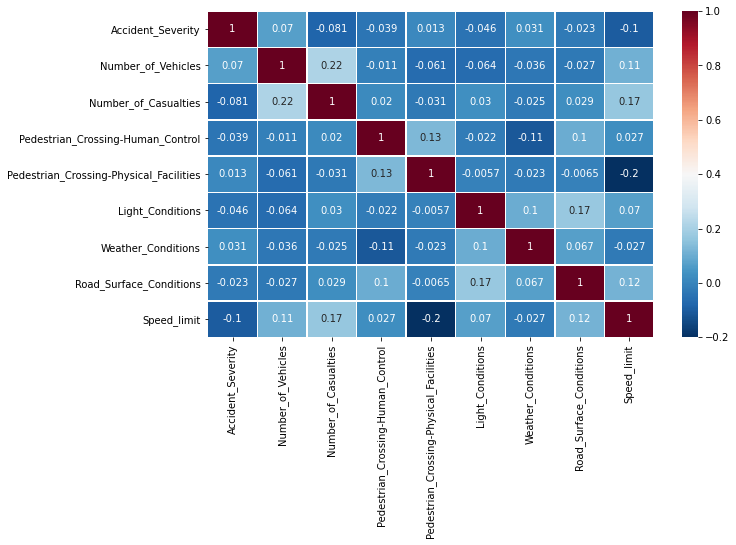

In [14]:
sb.heatmap(DFcorr, 
            xticklabels=DFcorr.columns,
            yticklabels=DFcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [15]:
DFcorr2=DF.corr(method ='kendall')
DFcorr2

C:\Users\Cex\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Speed_limit
Accident_Severity,1.000000,0.096985,-0.054281,-0.052242,0.003914,-0.039171,0.023202,-0.018787,-0.083562
Number_of_Vehicles,0.096985,1.000000,0.202810,-0.010762,-0.064198,-0.074742,-0.045921,-0.040557,0.086777
Number_of_Casualties,-0.054281,0.202810,1.000000,0.036253,-0.030453,0.025174,-0.009199,0.032932,0.168232
Pedestrian_Crossing-Human_Control,-0.052242,-0.010762,0.036253,1.000000,0.219188,-0.015921,-0.082311,0.082987,0.070117
Pedestrian_Crossing-Physical_Facilities,0.003914,-0.064198,-0.030453,0.219188,1.000000,0.005307,-0.026370,0.013396,-0.161739
Light_Conditions,-0.039171,-0.074742,0.025174,-0.015921,0.005307,1.000000,0.146257,0.207948,0.027574
Weather_Conditions,0.023202,-0.045921,-0.009199,-0.082311,-0.026370,0.146257,1.000000,0.468080,0.002058
Road_Surface_Conditions,-0.018787,-0.040557,0.032932,0.082987,0.013396,0.207948,0.468080,1.000000,0.092540
Speed_limit,-0.083562,0.086777,0.168232,0.070117,-0.161739,0.027574,0.002058,0.092540,1.000000


<AxesSubplot:>

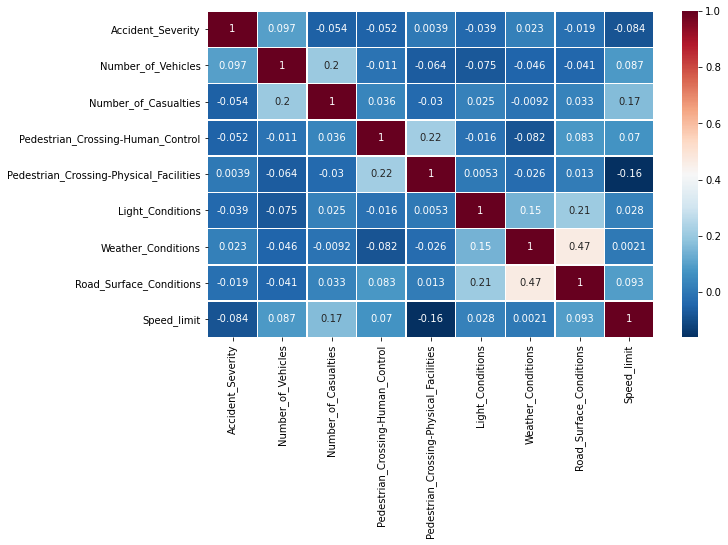

In [16]:
sb.heatmap(DFcorr2, 
            xticklabels=DFcorr.columns,
            yticklabels=DFcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [17]:
DFcorr3=DF.corr(method ='spearman')
DFcorr3

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Speed_limit
Accident_Severity,1.000000,0.101192,-0.055951,-0.052875,0.004098,-0.040653,0.024100,-0.019133,-0.090699
Number_of_Vehicles,0.101192,1.000000,0.214954,-0.011276,-0.069877,-0.080029,-0.049220,-0.042629,0.096581
Number_of_Casualties,-0.055951,0.214954,1.000000,0.037323,-0.032562,0.026603,-0.009710,0.034116,0.185708
Pedestrian_Crossing-Human_Control,-0.052875,-0.011276,0.037323,1.000000,0.228453,-0.016505,-0.085425,0.084455,0.076225
Pedestrian_Crossing-Physical_Facilities,0.004098,-0.069877,-0.032562,0.228453,1.000000,0.005738,-0.028504,0.014310,-0.182565
Light_Conditions,-0.040653,-0.080029,0.026603,-0.016505,0.005738,1.000000,0.155179,0.216584,0.030913
Weather_Conditions,0.024100,-0.049220,-0.009710,-0.085425,-0.028504,0.155179,1.000000,0.481984,0.002188
Road_Surface_Conditions,-0.019133,-0.042629,0.034116,0.084455,0.014310,0.216584,0.481984,1.000000,0.100949
Speed_limit,-0.090699,0.096581,0.185708,0.076225,-0.182565,0.030913,0.002188,0.100949,1.000000


<AxesSubplot:>

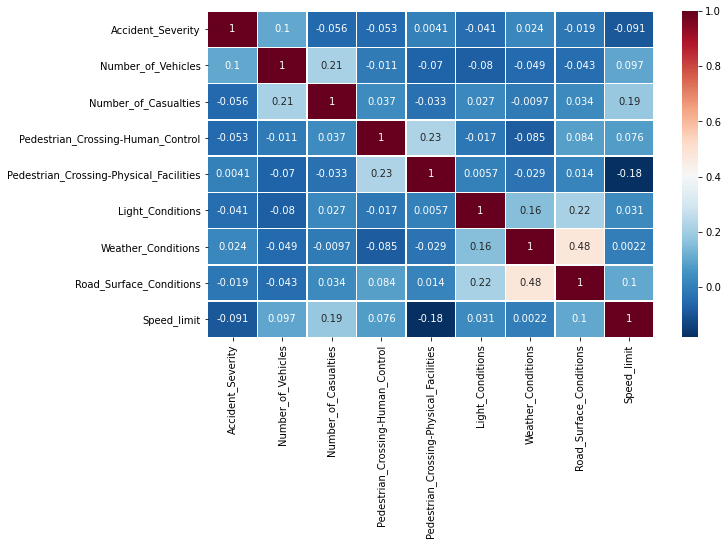

In [18]:
sb.heatmap(DFcorr3, 
            xticklabels=DFcorr.columns,
            yticklabels=DFcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)